In [1]:
# gurobi free license only supports 2000 linear constraints, for higher n a (academic) license is needed
import gurobipy as gp
import numpy as np
from gurobipy import GRB
import matplotlib.pyplot as plt
import string
import matplotlib
import seaborn as sns

In [2]:
def createmodel(n):
    model = gp.Model('nqueens')
    model.params.LogToConsole = 0
    squares = model.addMVar((n, n), vtype=GRB.BINARY, name="x")
    model.setObjective(squares.sum(), GRB.MAXIMIZE)
    # alternative formulation following Nudelman, in one line (technically)
    for e_1 in range(0,2):
        for e_2 in range(-1,2):
            if (e_1!=0 or e_2!=0) and e_1+e_2>=0:
                model.addConstrs(gp.quicksum(squares[i, j] for i in range(n) for j in range(n) if e_1*i + e_2*j == k) <= 1 for k in range(max(e_1,e_2,0)*-n, (e_1+max(e_2,0))*n))                     
    model.params.PoolSearchMode = 0  
    model.params.PoolSolutions = 10**6
    model.params.PoolGap = 0  
    return(model, squares)

In [3]:
def solve(n, model, squares, mode):
    model.params.LogToConsole = 0   
    model.optimize()
    
    if mode == 1:
        
        image = np.zeros(n*n)
        image = image.reshape((n, n))
        row_labels = range(n)
        col_labels = list(string.ascii_uppercase[0:n])
        if n > 26:
            col_labels = range(n)

        for i in range(n):
            for j in range(n):
                if (i+j)%2 == 0:
                    image[i,j] = 0.5
                if squares.X[i,j] == 1:
                    image[i,j] = squares.X[i,j]+0.5
        plt.figure(figsize=(10,10))
        plt.matshow(image, fignum=1)
        plt.xticks(range(n), col_labels)
        plt.yticks(range(n), row_labels)
        plt.show()
        print('Queens placed: %g' % model.objVal)

Set parameter Username

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2022-01-20


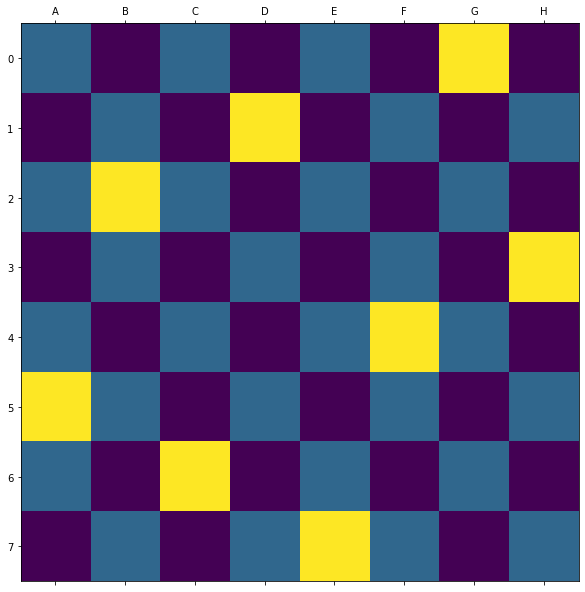

Queens placed: 8


In [4]:
#example how to run the code
n = 8
model, squares = createmodel(n)
solve(n, model, squares, 1)